In [2]:
import zipfile
import os

# Assuming you uploaded the zip file manually
# List the files in /content to confirm your zip file is there
os.listdir('/content')

# Unzip the uploaded file (make sure to replace 'clasification-roi.zip' with the actual file name if different)
zip_file = '/content/clasification-roi.zip'  # Adjust filename if necessary

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')  # Extract to /content/dataset

# Verify the extraction by listing the contents of the dataset folder
os.listdir('/content/dataset')


['test', 'val', 'train']

In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define image transformations (you can modify these if needed)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization (ImageNet-style)
])

# Update the paths based on extracted dataset
train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'
test_dir = '/content/dataset/test'

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Example: Print number of classes
num_classes = len(train_dataset.classes)
print(f'Number of classes: {num_classes}')

Number of classes: 2


Benign Class (Training):


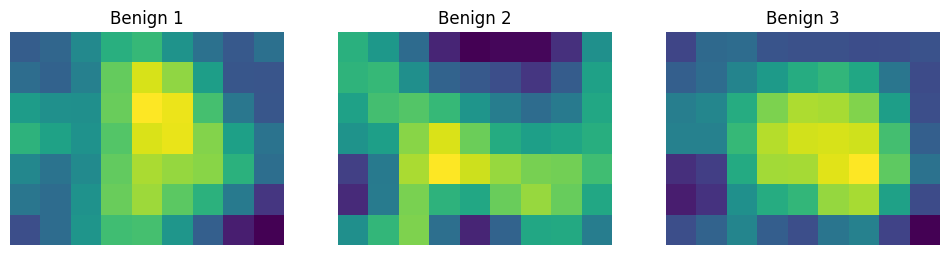

Malignant Class (Training):


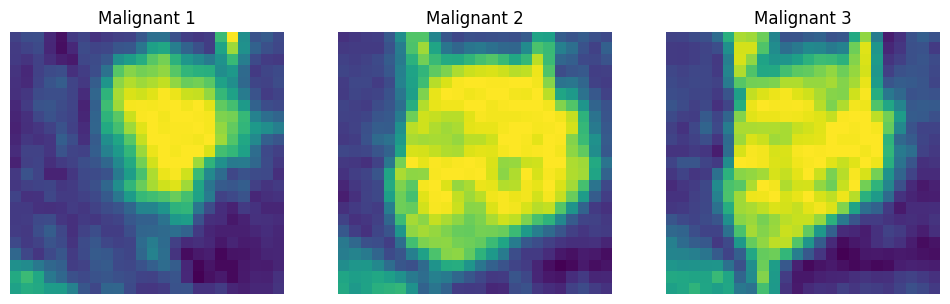

In [4]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image
import os

# Function to display images from a class folder, including subdirectories
def show_images_from_class(class_folder, class_name, num_images=3):
    image_paths = []

    # Recursively walk through the folder and collect image paths
    for root, dirs, files in os.walk(class_folder):
        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg')):  # Filter for image files
                image_paths.append(os.path.join(root, file))

    # Select a few images
    image_paths = image_paths[:num_images]

    plt.figure(figsize=(12, 4))

    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f'{class_name} {i + 1}')
        plt.axis('off')

    plt.show()

# Paths to Benign and Malignant folders in training dataset
benign_train_dir = os.path.join(train_dir, 'Benign')
malignant_train_dir = os.path.join(train_dir, 'Malignant')

# Display sample Benign images
print("Benign Class (Training):")
show_images_from_class(benign_train_dir, 'Benign')

# Display sample Malignant images
print("Malignant Class (Training):")
show_images_from_class(malignant_train_dir, 'Malignant')


In [5]:
import os

# Function to count the number of images in a folder (including subdirectories)
def count_images_in_class(class_folder):
    image_count = 0
    for root, dirs, files in os.walk(class_folder):
        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg')):  # Filter for image files
                image_count += 1
    return image_count

# Define the paths
train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'
test_dir = '/content/dataset/test'

# Paths to Benign and Malignant folders in training, validation, and test datasets
benign_train_dir = os.path.join(train_dir, 'Benign')
malignant_train_dir = os.path.join(train_dir, 'Malignant')

benign_val_dir = os.path.join(val_dir, 'Benign')
malignant_val_dir = os.path.join(val_dir, 'Malignant')

benign_test_dir = os.path.join(test_dir, 'Benign')
malignant_test_dir = os.path.join(test_dir, 'Malignant')

# Count images in Benign and Malignant classes for training, validation, and test sets
benign_train_count = count_images_in_class(benign_train_dir)
malignant_train_count = count_images_in_class(malignant_train_dir)

benign_val_count = count_images_in_class(benign_val_dir)
malignant_val_count = count_images_in_class(malignant_val_dir)

benign_test_count = count_images_in_class(benign_test_dir)
malignant_test_count = count_images_in_class(malignant_test_dir)

# Print the counts
print(f"Benign (Training): {benign_train_count} images")
print(f"Malignant (Training): {malignant_train_count} images")
print(f"Benign (Validation): {benign_val_count} images")
print(f"Malignant (Validation): {malignant_val_count} images")
print(f"Benign (Test): {benign_test_count} images")
print(f"Malignant (Test): {malignant_test_count} images")


Benign (Training): 5559 images
Malignant (Training): 14875 images
Benign (Validation): 408 images
Malignant (Validation): 1581 images
Benign (Test): 1938 images
Malignant (Test): 4913 images


In [6]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define transformations for training and validation datasets
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a fixed size
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip the image horizontally
    transforms.RandomRotation(degrees=30),  # Randomly rotate the image by up to 30 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random color jitter
    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),  # Randomly crop and resize the image
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image (ImageNet style)
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize validation images to a fixed size
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image (ImageNet style)
])

# Paths to data directories
train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'

# Load datasets with transformations
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Example: Check number of classes
num_classes = len(train_dataset.classes)
print(f'Number of classes: {num_classes}')


Number of classes: 2


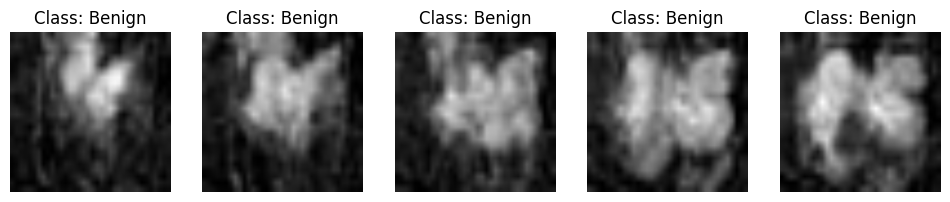

In [7]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define transformations including resizing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor()  # Convert image to tensor
])

# Load dataset (for example, from the training set)
train_dataset = datasets.ImageFolder(train_dir, transform=transform)

# Display a few resized images
def show_resized_images(dataset, num_images=5):
    plt.figure(figsize=(12, 6))

    for i in range(num_images):
        img, label = dataset[i]
        img = img.permute(1, 2, 0).numpy()  # Rearrange dimensions to (H, W, C) for plotting

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f'Class: {dataset.classes[label]}')
        plt.axis('off')

    plt.show()

# Show resized images from the training dataset
show_resized_images(train_dataset)


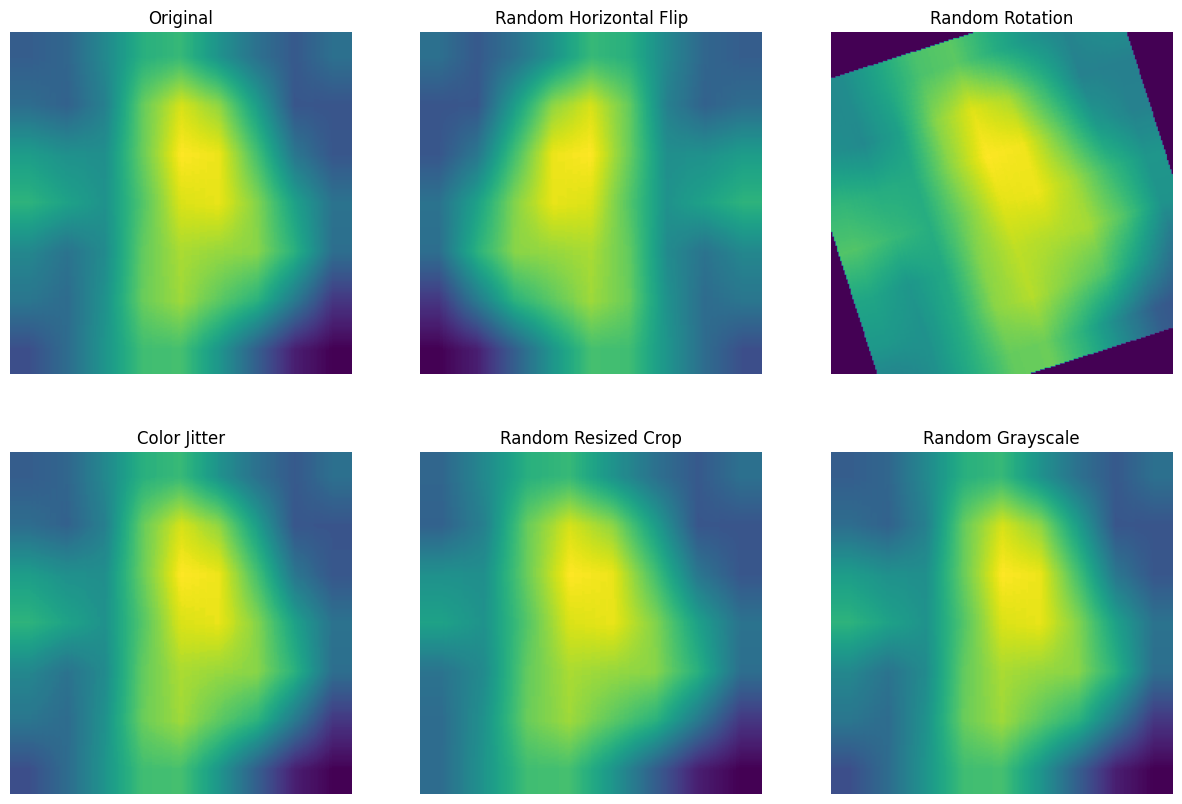

In [9]:
import os
import zipfile
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

# Step 1: Unzip the file (assuming it's uploaded as clasification-roi.zip)
zip_file = '/content/clasification-roi.zip'
extract_dir = '/content/dataset'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Define the training directory paths
train_dir = os.path.join(extract_dir, 'train')

# Step 3: Find the first image file in the Benign class directory
def find_image_file(directory):
    for root, _, files in os.walk(directory):
        for file_name in files:
            if file_name.endswith(('.png', '.jpg', '.jpeg')):  # Add more extensions if needed
                return os.path.join(root, file_name)
    raise FileNotFoundError("No image file found in the directory")

benign_class_dir = os.path.join(train_dir, 'Benign')
sample_image_path = find_image_file(benign_class_dir)

# Load the sample image
image = Image.open(sample_image_path)

# Step 4: Define augmentations
augmentations = {
    "Original": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ]),
    "Random Horizontal Flip": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ToTensor()
    ]),
    "Random Rotation": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomRotation(degrees=30),
        transforms.ToTensor()
    ]),
    "Color Jitter": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor()
    ]),
    "Random Resized Crop": transforms.Compose([
        transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),
        transforms.ToTensor()
    ]),
    "Random Grayscale": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomGrayscale(p=1.0),
        transforms.ToTensor()
    ]),
}
# Step 5: Function to show augmented images
def show_augmented_images(image, augmentations):
    plt.figure(figsize=(15, 10))
    for i, (name, transform) in enumerate(augmentations.items()):
        transformed_image = transform(image).permute(1, 2, 0).numpy()  # Convert tensor to (H, W, C)

        plt.subplot(2, 3, i + 1)
        plt.imshow(transformed_image)
        plt.title(name)
        plt.axis('off')

    plt.show()

# Step 6: Display the original and augmented images
show_augmented_images(image, augmentations)


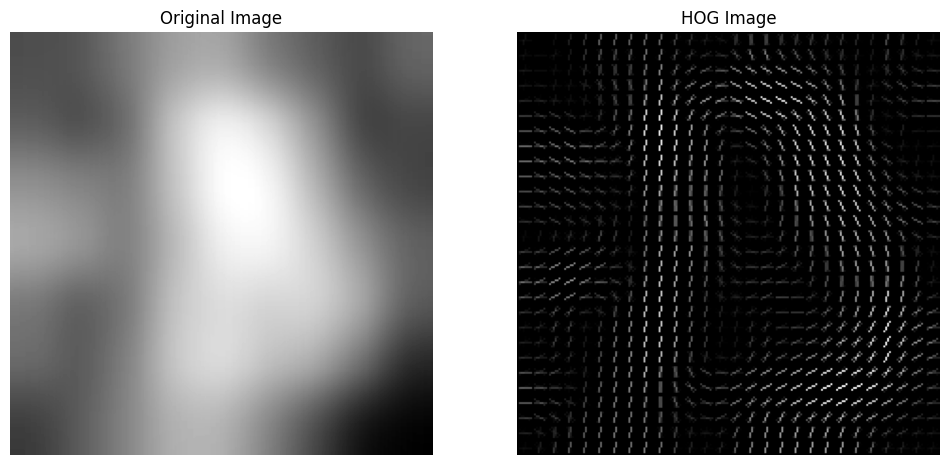

In [10]:
import os
import zipfile
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from skimage.feature import hog
from skimage import exposure

# Step 1: Extract the dataset
zip_file = '/content/clasification-roi.zip'
extract_dir = '/content/dataset'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Load the image (same as before)
train_dir = os.path.join(extract_dir, 'train')
benign_class_dir = os.path.join(train_dir, 'Benign')
sample_image_path = find_image_file(benign_class_dir)  # Using the previous function to find an image
image = Image.open(sample_image_path).convert('L')  # Convert to grayscale for HOG

# Step 3: Resize the image (optional for consistency)
image = image.resize((224, 224))

# Step 4: Convert the image to a NumPy array
image_np = np.array(image)

# Step 5: Compute the HOG features and the HOG image
hog_features, hog_image = hog(image_np, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

# Step 6: Rescale the HOG image for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Step 7: Display the original image and the HOG image
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# HOG image
plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Image')
plt.axis('off')

plt.show()


Using image: /content/dataset/train/Benign/BreaDM-Be-2021/VIBRANT+C4/p-075.jpg


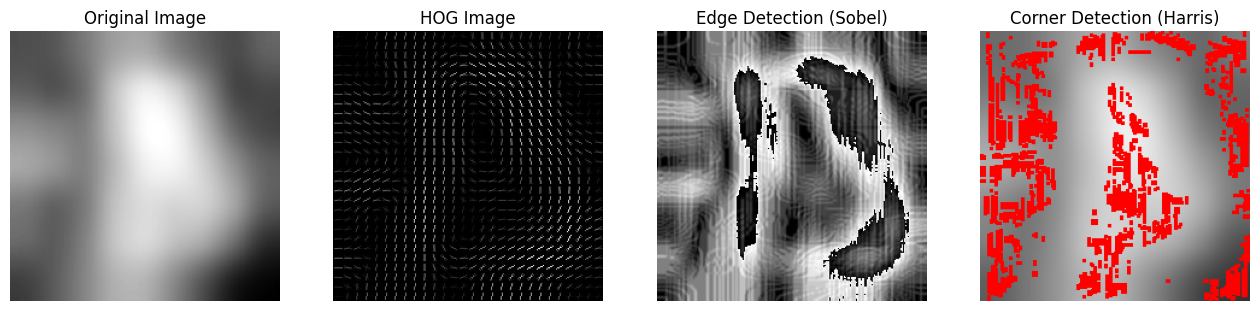

In [11]:
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from skimage.feature import hog
from skimage import exposure

# Step 1: Extract the dataset
zip_file = '/content/clasification-roi.zip'  # Correct path to your zip file
extract_dir = '/content/dataset'  # Directory to extract the contents

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Define function to find an image file
def find_image_file(directory):
    for root, _, files in os.walk(directory):
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                return os.path.join(root, file_name)
    return None

# Step 3: Load an image from the 'train/Benign' directory
train_dir = os.path.join(extract_dir, 'train')
benign_class_dir = os.path.join(train_dir, 'Benign')
sample_image_path = find_image_file(benign_class_dir)  # Find an image from the Benign class

if sample_image_path is None:
    raise FileNotFoundError(f"No images found in {benign_class_dir}")
else:
    print(f"Using image: {sample_image_path}")

# Step 4: Load the image and convert to grayscale for HOG, edge detection, and corner detection
image = Image.open(sample_image_path).convert('L')  # Convert to grayscale for processing

# Step 5: Resize the image (optional for consistency)
image = image.resize((224, 224))

# Step 6: Convert the image to a NumPy array
image_np = np.array(image)

# Step 7: Apply HOG (Histogram of Oriented Gradients)
hog_features, hog_image = hog(image_np, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

# Rescale the HOG image for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Step 8: Apply Sobel edge detection
def apply_sobel_edge_detection(image_np):
    # Compute the gradient along the x and y axis
    sobel_x = cv2.Sobel(image_np, cv2.CV_64F, 1, 0, ksize=5)  # Gradient in x direction
    sobel_y = cv2.Sobel(image_np, cv2.CV_64F, 0, 1, ksize=5)  # Gradient in y direction

    # Calculate the magnitude of the gradients
    edges = np.sqrt(sobel_x**2 + sobel_y**2)
    edges = np.uint8(edges)  # Convert to uint8 for display
    return edges

# Apply Sobel edge detection
edges = apply_sobel_edge_detection(image_np)

# Step 9: Apply Harris Corner Detection
def apply_corner_detection(image_np):
    # Convert to float32 as required by the Harris corner detector
    gray_image_float = np.float32(image_np)
    # Apply Harris corner detection
    corners = cv2.cornerHarris(gray_image_float, blockSize=2, ksize=3, k=0.04)
    # Dilate the corner points to make them more visible
    corners = cv2.dilate(corners, None)
    # Mark corners on the original image (set corner pixels to red)
    image_with_corners = cv2.cvtColor(image_np, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB for visualization
    image_with_corners[corners > 0.01 * corners.max()] = [255, 0, 0]  # Red color for corners
    return image_with_corners

corners_image = apply_corner_detection(image_np)

# Step 10: Display the original image, HOG image, Sobel edge detection, and corner detection results
plt.figure(figsize=(16, 8))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(image_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# HOG image
plt.subplot(1, 4, 2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Image')
plt.axis('off')

# Edge detection result using Sobel
plt.subplot(1, 4, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Sobel)')
plt.axis('off')

# Corner detection result
plt.subplot(1, 4, 4)
plt.imshow(corners_image)
plt.title('Corner Detection (Harris)')
plt.axis('off')

plt.show()

Saving p-032.jpg to p-032.jpg
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] Hx

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] Hy



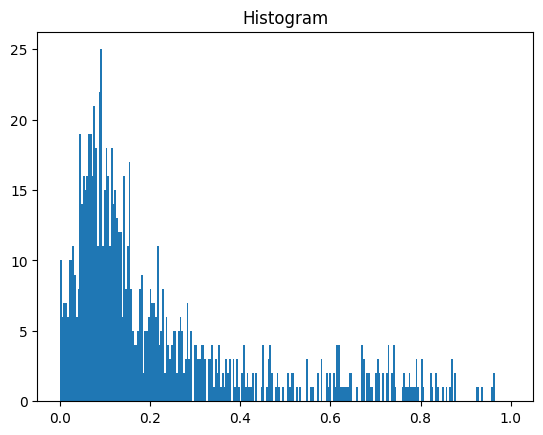

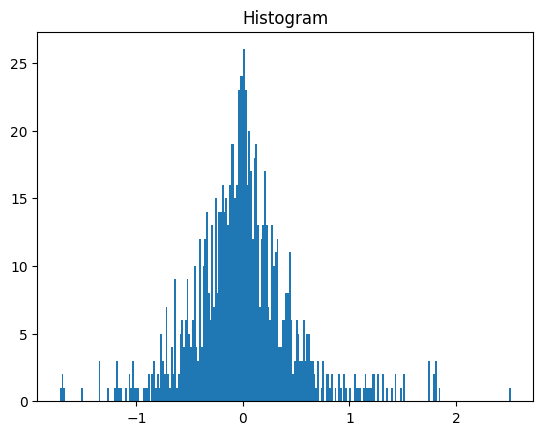

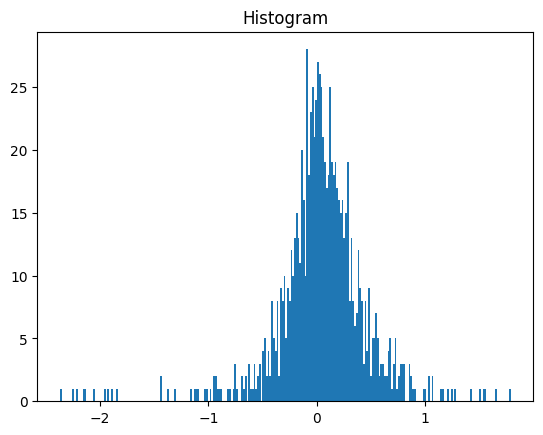

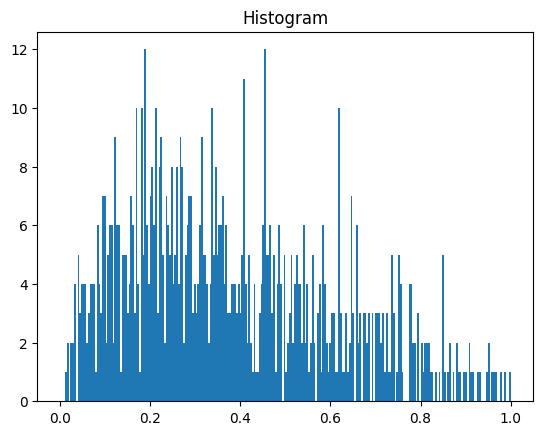

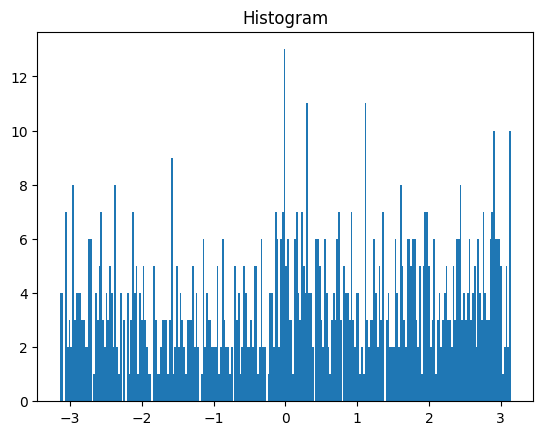

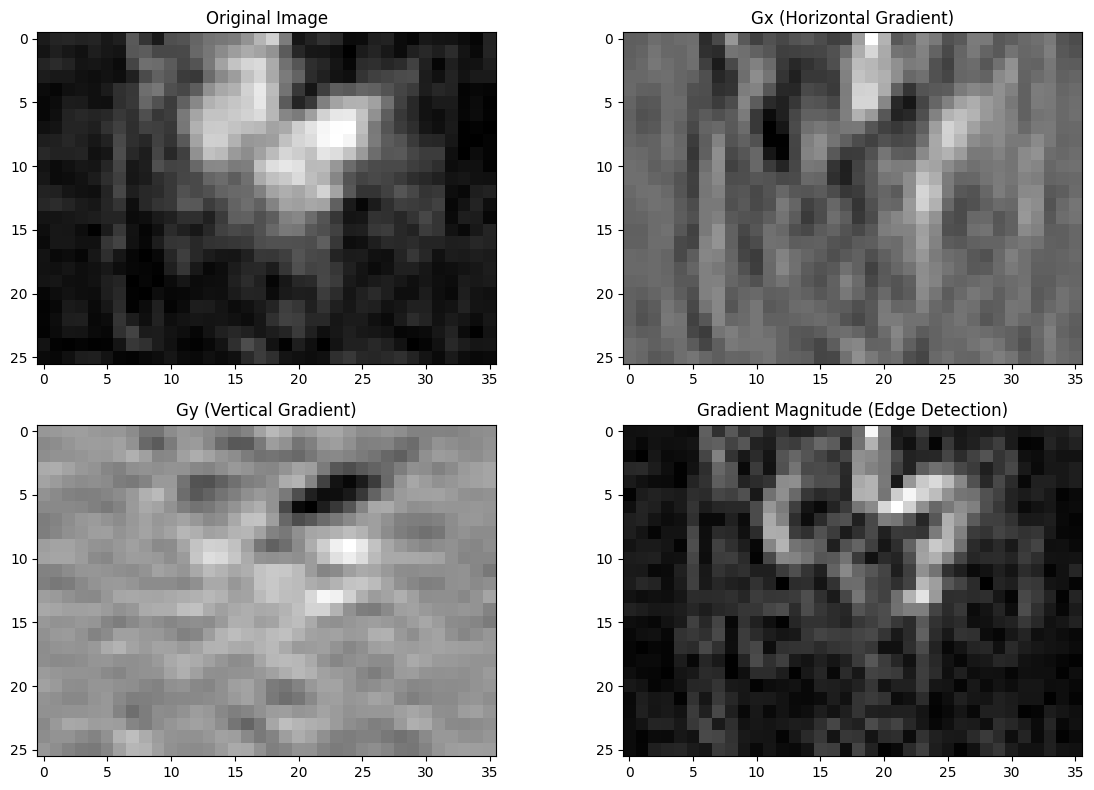

In [12]:
# Ensure necessary imports are present
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import imageio
import warnings
warnings.filterwarnings('ignore')

# Upload image in Colab
from google.colab import files
uploaded = files.upload()

# Assuming you've uploaded 'p-032.jpg'
img_path = list(uploaded.keys())[0]

# Helper functions for Sobel detection and histogram plotting
def convolve(image, kernel):
    """Apply a kernel to an image using 2D convolution."""
    return cv2.filter2D(image, -1, kernel)

def histogram(image, interval):
    """Plot a histogram of image values."""
    plt.hist(image.ravel(), bins=256, range=interval)
    plt.title('Histogram')
    plt.show()

# Sobel filter kernels
ht = np.array([[1, 2, 1]])  # Horizontal kernel
hc = np.array([[1, 0, -1]])  # Vertical kernel

Hx = ht.T * hc  # Sobel operator for X (horizontal edge detection)
Hy = hc.T * ht  # Sobel operator for Y (vertical edge detection)

print(Hx, end=' Hx\n\n')
print(Hy, end=' Hy\n\n')

# Read and preprocess the image (convert it to grayscale)
img_in = imageio.imread(img_path) / 255.0
if img_in.ndim == 3:  # Convert to grayscale if the image is RGB
    img_in = np.median(img_in, axis=2)

# Plot the histogram of the original image
histogram(img_in, interval=[0, 1])

r = 1  # Define padding size

# Padding the image with edge padding
img_pad = np.pad(img_in, ((r, r), (r, r)), 'edge')

# Apply convolution with the Sobel operators
Gx = convolve(img_pad, Hx)[r:-r, r:-r]  # Gradient in X direction
histogram(Gx, interval=[Gx.min(), Gx.max()])  # Plot Gx histogram

Gy = convolve(img_pad, Hy)[r:-r, r:-r]  # Gradient in Y direction
histogram(Gy, interval=[Gy.min(), Gy.max()])  # Plot Gy histogram

# Compute gradient magnitude
G = (Gx**2 + Gy**2)**0.5
histogram(G, interval=[0, 1])  # Plot magnitude histogram

# Compute gradient direction (Theta)
Theta = np.arctan2(Gy, Gx)
histogram(Theta, interval=[Theta.min(), Theta.max()])  # Plot direction histogram

# Display the results: original image, Gx, Gy, gradient magnitude (G)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_in, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(Gx, cmap='gray')
plt.title("Gx (Horizontal Gradient)")

plt.subplot(2, 2, 3)
plt.imshow(Gy, cmap='gray')
plt.title("Gy (Vertical Gradient)")

plt.subplot(2, 2, 4)
plt.imshow(G, cmap='gray')
plt.title("Gradient Magnitude (Edge Detection)")

plt.tight_layout()
plt.show()


Using image: /content/dataset/train/Benign/BreaDM-Be-2021/VIBRANT+C4/p-075.jpg


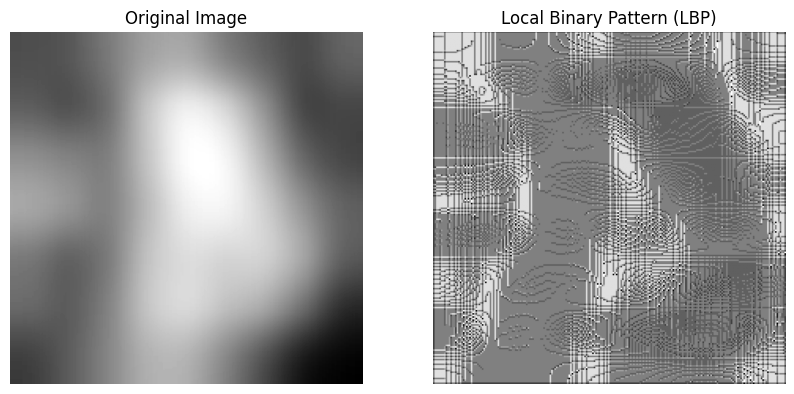

In [13]:
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from skimage.feature import local_binary_pattern

# Step 1: Extract the dataset
zip_file = '/content/clasification-roi.zip'  # Correct path to your zip file
extract_dir = '/content/dataset'  # Directory to extract the contents

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Define function to find an image file
def find_image_file(directory):
    for root, _, files in os.walk(directory):
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                return os.path.join(root, file_name)
    return None

# Step 3: Load an image from the 'train/Benign' directory
train_dir = os.path.join(extract_dir, 'train')
benign_class_dir = os.path.join(train_dir, 'Benign')
sample_image_path = find_image_file(benign_class_dir)  # Find an image from the Benign class

if sample_image_path is None:
    raise FileNotFoundError(f"No images found in {benign_class_dir}")
else:
    print(f"Using image: {sample_image_path}")

# Step 4: Load the image and convert to grayscale
image = Image.open(sample_image_path).convert('L')  # Convert to grayscale for processing

# Step 5: Resize the image (optional for consistency)
image = image.resize((224, 224))

# Step 6: Convert the image to a NumPy array
image_np = np.array(image)

# Step 7: Apply Local Binary Pattern (LBP)
radius = 1
n_points = 8 * radius
lbp = local_binary_pattern(image_np, n_points, radius, method='uniform')

# Step 8: Display the original image and LBP result
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# LBP image
plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')
plt.title('Local Binary Pattern (LBP)')
plt.axis('off')

plt.show()


Using images: ['/content/dataset/train/Benign/BreaDM-Be-2021/VIBRANT+C4/p-075.jpg', '/content/dataset/train/Benign/BreaDM-Be-2021/VIBRANT+C4/p-077.jpg', '/content/dataset/train/Benign/BreaDM-Be-2021/VIBRANT+C4/p-076.jpg', '/content/dataset/train/Benign/BreaDM-Be-2021/VIBRANT+C7/p-075.jpg', '/content/dataset/train/Benign/BreaDM-Be-2021/VIBRANT+C7/p-077.jpg']


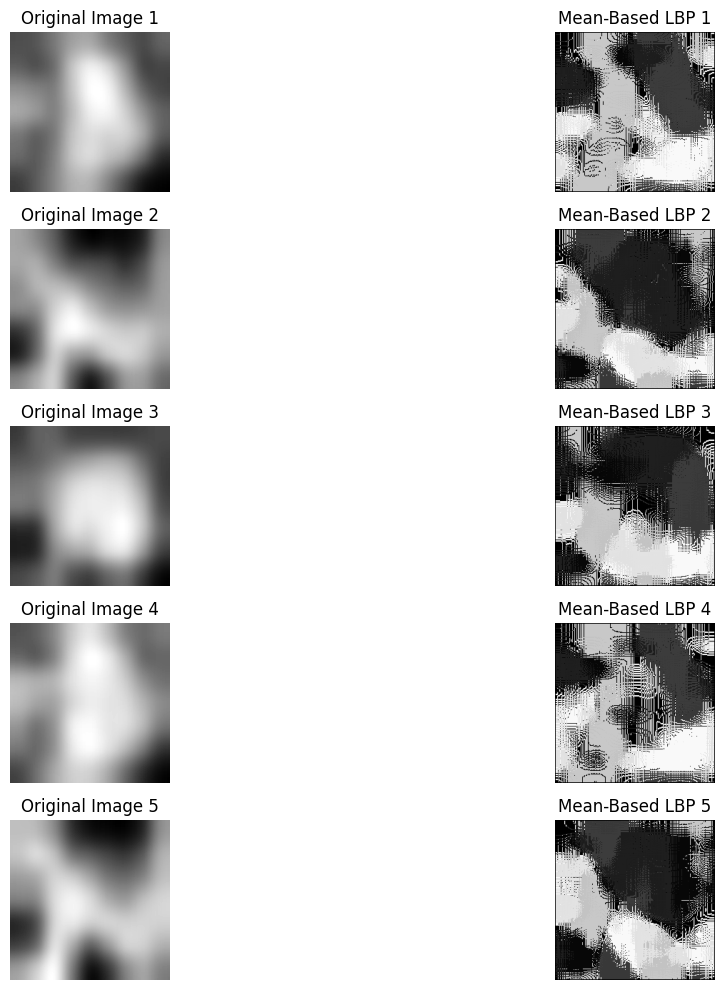

In [14]:
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Step 1: Extract the dataset
zip_file = '/content/clasification-roi.zip'  # Correct path to your zip file
extract_dir = '/content/dataset'  # Directory to extract the contents

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Define function to find image files in a directory
def find_image_files(directory, num_images=5):
    image_paths = []
    for root, _, files in os.walk(directory):
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, file_name))
                if len(image_paths) == num_images:
                    return image_paths
    return image_paths

# Step 3: Load images from the 'train/Benign' directory
train_dir = os.path.join(extract_dir, 'train')
benign_class_dir = os.path.join(train_dir, 'Benign')
sample_image_paths = find_image_files(benign_class_dir)  # Find 5 images from the Benign class

if not sample_image_paths:
    raise FileNotFoundError(f"No images found in {benign_class_dir}")
else:
    print(f"Using images: {sample_image_paths}")

# Step 4: Load images and convert to grayscale
images = []
for sample_image_path in sample_image_paths:
    image = Image.open(sample_image_path).convert('L')  # Convert to grayscale for processing
    image = image.resize((224, 224))  # Resize the image (optional for consistency)
    images.append(np.array(image))

# Step 5: Apply Mean-Based Local Binary Pattern (LBP)
def mean_based_lbp(image, radius=1):
    # Get the dimensions of the image
    h, w = image.shape
    # Initialize the LBP output
    lbp_image = np.zeros_like(image, dtype=np.uint8)

    # Define the offsets for the LBP neighbors
    offsets = [(np.cos(theta) * radius, np.sin(theta) * radius) for theta in np.linspace(0, 2 * np.pi, 8, endpoint=False)]

    # Iterate over the image
    for y in range(1, h-1):
        for x in range(1, w-1):
            center_pixel = image[y, x]
            # Extract the neighborhood
            neighborhood = []
            for dx, dy in offsets:
                ix, iy = int(x + dx), int(y + dy)
                neighborhood.append(image[iy, ix])

            # Calculate the mean of the neighborhood
            mean_value = np.mean(neighborhood)
            # Compare each pixel in the neighborhood to the mean
            lbp_value = sum((1 if p > mean_value else 0) << i for i, p in enumerate(neighborhood))
            lbp_image[y, x] = lbp_value

    return lbp_image

# Step 6: Compute and display mean-based LBP for each image
plt.figure(figsize=(15, 10))

for idx, image_np in enumerate(images):
    # Compute mean-based LBP
    lbp_image = mean_based_lbp(image_np)

    # Display original image
    plt.subplot(len(images), 2, idx * 2 + 1)
    plt.imshow(image_np, cmap='gray')
    plt.title(f'Original Image {idx + 1}')
    plt.axis('off')

    # Display Mean-Based LBP image
    plt.subplot(len(images), 2, idx * 2 + 2)
    plt.imshow(lbp_image, cmap='gray')
    plt.title(f'Mean-Based LBP {idx + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


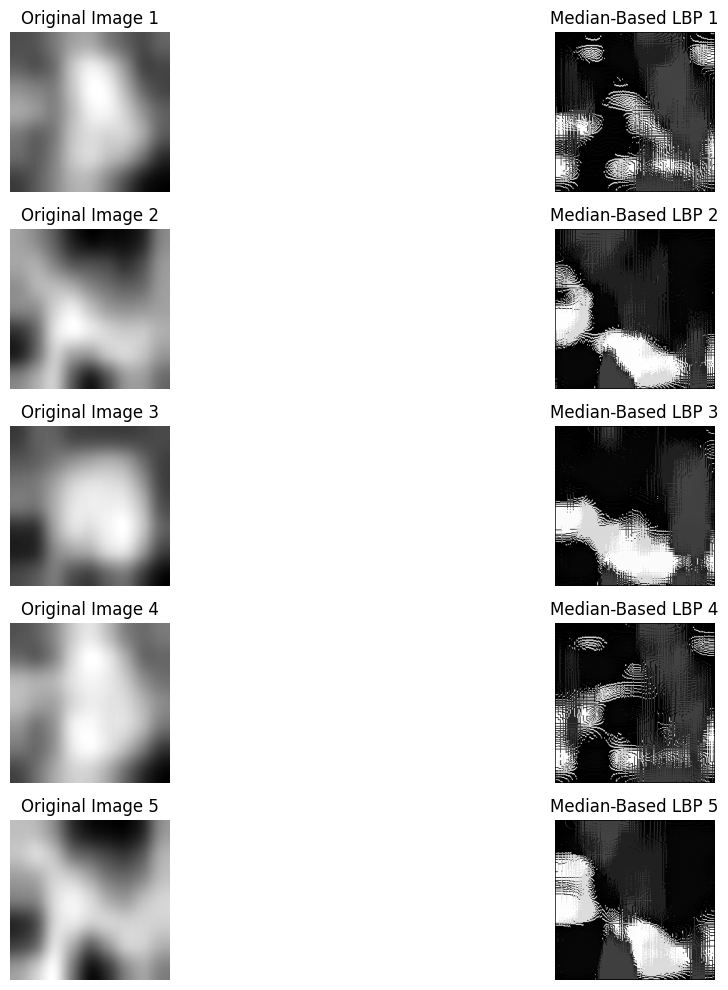

In [15]:
def median_based_lbp(image, radius=1):
    # Get the dimensions of the image
    h, w = image.shape
    # Initialize the LBP output
    lbp_image = np.zeros_like(image, dtype=np.uint8)

    # Define the offsets for the LBP neighbors
    offsets = [(np.cos(theta) * radius, np.sin(theta) * radius) for theta in np.linspace(0, 2 * np.pi, 8, endpoint=False)]

    # Iterate over the image
    for y in range(1, h-1):
        for x in range(1, w-1):
            center_pixel = image[y, x]
            # Extract the neighborhood
            neighborhood = []
            for dx, dy in offsets:
                ix, iy = int(x + dx), int(y + dy)
                neighborhood.append(image[iy, ix])

            # Calculate the median of the neighborhood
            median_value = np.median(neighborhood)
            # Compare each pixel in the neighborhood to the median
            lbp_value = sum((1 if p > median_value else 0) << i for i, p in enumerate(neighborhood))
            lbp_image[y, x] = lbp_value

    return lbp_image

# Step 6: Compute and display median-based LBP for each image
plt.figure(figsize=(15, 10))

for idx, image_np in enumerate(images):
    # Compute median-based LBP
    lbp_image = median_based_lbp(image_np)

    # Display original image
    plt.subplot(len(images), 2, idx * 2 + 1)
    plt.imshow(image_np, cmap='gray')
    plt.title(f'Original Image {idx + 1}')
    plt.axis('off')

    # Display Median-Based LBP image
    plt.subplot(len(images), 2, idx * 2 + 2)
    plt.imshow(lbp_image, cmap='gray')
    plt.title(f'Median-Based LBP {idx + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

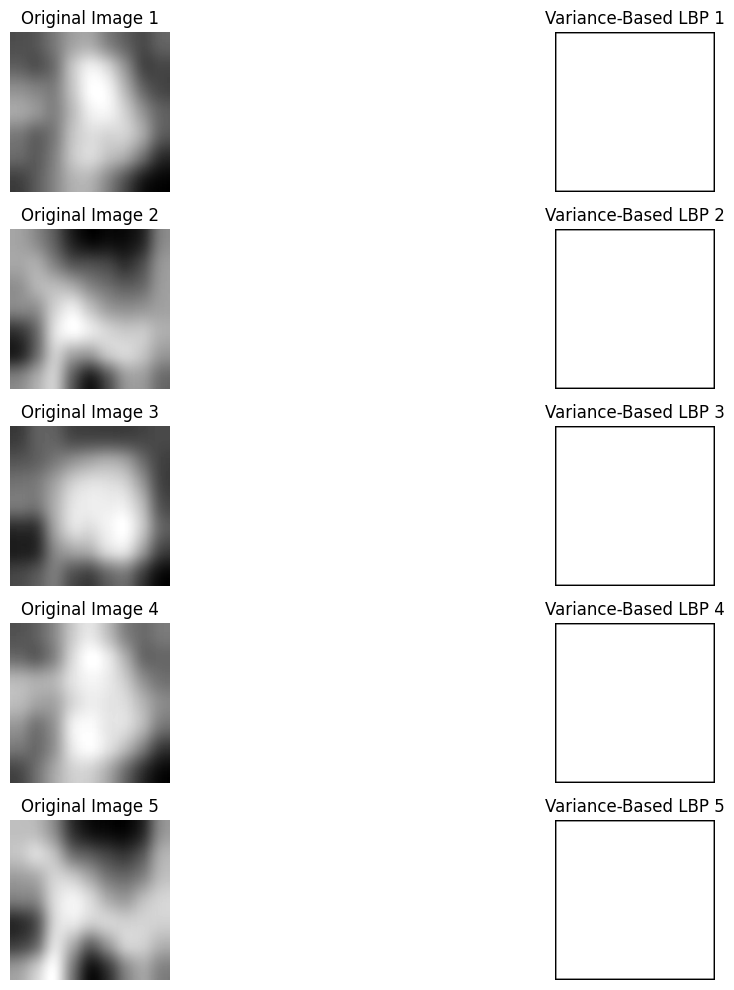

In [16]:
def variance_based_lbp(image, radius=2):
    h, w = image.shape
    lbp_image = np.zeros((h, w), dtype=np.uint8)

    # Define offsets for neighbors based on the radius
    offsets = [(int(round(np.cos(theta) * radius)), int(round(np.sin(theta) * radius)))
               for theta in np.linspace(0, 2 * np.pi, 8, endpoint=False)]

    # Apply LBP, excluding borders
    for y in range(radius, h - radius):
        for x in range(radius, w - radius):
            # Calculate the variance of the neighborhood
            neighborhood = [image[y + dy, x + dx] for dx, dy in offsets]
            variance_value = np.var(neighborhood)

            # Calculate LBP based on the variance
            lbp_value = sum((1 if p > variance_value else 0) << i for i, p in enumerate(neighborhood))
            lbp_image[y, x] = lbp_value

    # Normalize to enhance visibility but keep grayscale
    lbp_image = cv2.normalize(lbp_image, None, 0, 255, cv2.NORM_MINMAX)
    return lbp_image

# Step 6: Compute and display variance-based LBP for each image
plt.figure(figsize=(15, 10))

for idx, image_np in enumerate(images):
    # Compute variance-based LBP
    lbp_image = variance_based_lbp(image_np)

    # Display original image
    plt.subplot(len(images), 2, idx * 2 + 1)
    plt.imshow(image_np, cmap='gray')
    plt.title(f'Original Image {idx + 1}')
    plt.axis('off')

    # Display Variance-Based LBP image in grayscale
    plt.subplot(len(images), 2, idx * 2 + 2)
    plt.imshow(lbp_image, cmap='gray')
    plt.title(f'Variance-Based LBP {idx + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Using images: ['/content/dataset/train/Benign/BreaDM-Be-2021/VIBRANT+C4/p-075.jpg', '/content/dataset/train/Benign/BreaDM-Be-2021/VIBRANT+C4/p-077.jpg', '/content/dataset/train/Benign/BreaDM-Be-2021/VIBRANT+C4/p-076.jpg', '/content/dataset/train/Benign/BreaDM-Be-2021/VIBRANT+C7/p-075.jpg', '/content/dataset/train/Benign/BreaDM-Be-2021/VIBRANT+C7/p-077.jpg']


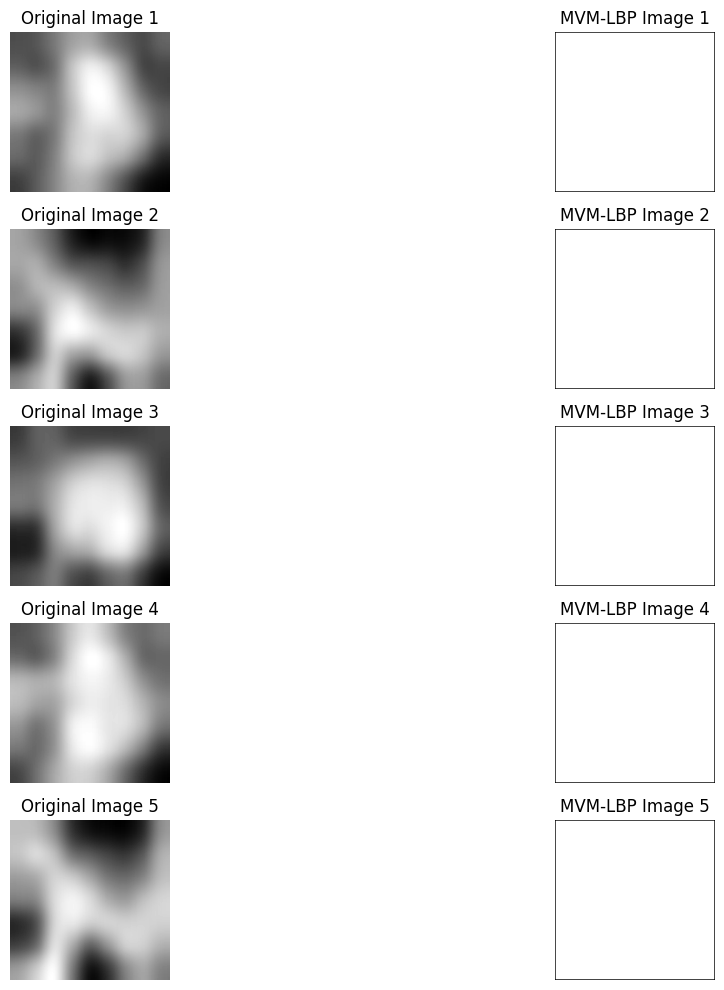

In [17]:
import os
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Extract the dataset
zip_file = '/content/clasification-roi.zip'  # Correct path to your zip file
extract_dir = '/content/dataset'  # Directory to extract the contents

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Define function to find image files in a directory
def find_image_files(directory, num_images=5):
    image_paths = []
    for root, _, files in os.walk(directory):
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, file_name))
                if len(image_paths) == num_images:
                    return image_paths
    return image_paths

# Step 3: Load images from the 'train/Benign' directory
train_dir = os.path.join(extract_dir, 'train')
benign_class_dir = os.path.join(train_dir, 'Benign')
sample_image_paths = find_image_files(benign_class_dir)  # Find 5 images from the Benign class

if not sample_image_paths:
    raise FileNotFoundError(f"No images found in {benign_class_dir}")
else:
    print(f"Using images: {sample_image_paths}")

# Step 4: Load images and convert to grayscale
images = []
for sample_image_path in sample_image_paths:
    image = Image.open(sample_image_path).convert('L')  # Convert to grayscale for processing
    image = image.resize((224, 224))  # Resize the image (optional for consistency)
    images.append(np.array(image))

# Step 5: Apply Mean-Variance-Median (MVM) LBP
def mvm_lbp(image, radius=1):
    h, w = image.shape
    lbp_image = np.zeros((h, w), dtype=np.uint8)

    # Define offsets for a 3x3 neighborhood
    offsets = [(-1, -1), (-1, 0), (-1, 1),
               (0, -1),          (0, 1),
               (1, -1), (1, 0), (1, 1)]

    # Apply MVM-LBP, excluding borders
    for y in range(1, h - 1):
        for x in range(1, w - 1):
            # Calculate neighborhood values
            neighborhood = [image[y + dy, x + dx] for dx, dy in offsets]
            V_mean = np.mean(neighborhood)
            V_median = np.median(neighborhood)
            V_sqrt_variance = np.sqrt(np.var(neighborhood))

            # Calculate MVM threshold
            V_mvm = np.floor((V_mean + V_sqrt_variance + V_median) / 3)

            # Compute MVM LBP code
            lbp_value = 0
            for e, neighbor_value in enumerate(neighborhood):
                lbp_value |= (1 if neighbor_value >= V_mvm else 0) << e

            lbp_image[y, x] = lbp_value

    # Normalize for visualization in grayscale
    lbp_image = cv2.normalize(lbp_image, None, 0, 255, cv2.NORM_MINMAX)
    return lbp_image

# Step 6: Compute and display MVM LBP for each image
plt.figure(figsize=(15, 10))

for idx, image_np in enumerate(images):
    # Compute MVM LBP
    lbp_image = mvm_lbp(image_np)

    # Display original image
    plt.subplot(len(images), 2, idx * 2 + 1)
    plt.imshow(image_np, cmap='gray')
    plt.title(f'Original Image {idx + 1}')
    plt.axis('off')

    # Display MVM LBP image in grayscale
    plt.subplot(len(images), 2, idx * 2 + 2)
    plt.imshow(lbp_image, cmap='gray')
    plt.title(f'MVM-LBP Image {idx + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [1]:
import torch
import torchvision.models as models
# Load the pretrained VGG16 model from torchvision's model library
vgg16 = models.vgg16(pretrained=True)
# Set the model to evaluation mode to disable certain layers like dropout for inference
vgg16.eval()
# If you are planning to fine-tune the model on a custom dataset, set it to training mode
vgg16.train()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 164MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [2]:
import torch
import torch.nn as nn
import torchvision.models as models

# CustomVGG16 class inherits from nn.Module
class CustomVGG16(nn.Module):
    def __init__(self, num_classes=2):  # Fixed typo here
        super(CustomVGG16, self).__init__()  # Fixed typo here

        # Load pre-trained VGG16 model from torchvision.models
        vgg16 = models.vgg16(pretrained=True)

        # Extracting the features and avgpool layers from pretrained model
        self.features = vgg16.features
        self.avgpool = vgg16.avgpool

        # Define a new classifier using nn.Sequential
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),  # Input and output
            nn.ReLU(inplace=True),  # Activation
            nn.Dropout(),  # Regularization
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)  # Output layer for custom classes
        )

    def forward(self, x):
        x = self.features(x)  # Passing input through features layer
        x = self.avgpool(x)  # Using avgpool layer
        x = torch.flatten(x, 1)  # Reshaping output to 2D tensor
        x = self.classifier(x)  # Passing reshaped output to classifier
        return x

# Create model instance with 2 classes
model = CustomVGG16(num_classes=2)
print(model)



CustomVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, di

In [3]:
import numpy as np
import torch
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Initializes the EarlyStopping object with the specified parameters.
        Args:
            patience (int): Number of epochs to wait before stopping if no improvement occurs.
                            Default is 7.
            verbose (bool): Controls whether messages about validation loss improvements are printed.
                            Default is False.
            delta (float): Minimum change needed in validation loss to count as an improvement.
                            Default is 0.
           path (str): File path for saving the model when the validation loss improves.
                            Default is 'checkpoint.pt'.
            trace_func (function): Function used for printing log messages during training.
                            Default is the built-in print function.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0  # Counts epochs without validation loss improvement
        self.best_score = None  # Stores the best validation loss seen so far
        self.early_stop = False  # Flag indicating if training should stop
        self.val_loss_min = np.Inf  # Initial value to ensure comparison works in the first epoch
        self.delta = delta  # Threshold for considering an improvement
        self.path = path  # Path to save the model's state when validation loss drops
        self.trace_func = trace_func  # Function for outputting trace information
    def __call__(self, val_loss, model):
        """Evaluate validation loss and determine if early stopping should be triggered."""
        score = -val_loss  # Invert validation loss to simplify the comparison (lower is better)
        if self.best_score is None:
            # Save the initial model state as it’s the first evaluation
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            # No significant drop in validation loss; increment counter
            self.counter += 1
            self.trace_func(f"Early stopping counter: {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                # Stop training if patience is exceeded without improvement
                self.early_stop = True
        else:
            # Validation loss improved; update the best score and reset counter
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0
    def save_checkpoint(self, val_loss, model):
        """Save the model's state if there is an improvement in validation loss."""
        if self.verbose:
            self.trace_func(f"Validation loss reduced from {self.val_loss_min:.6f} to {val_loss:.6f}. Saving the model.")
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss  # Update the minimum validation loss

In [4]:
import os
import zipfile
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import time
zip_file = '/content/clasification-roi.zip'  # Correct path to your zip file
extract_dir = '/content/dataset'  # Directory to extract the contents

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
img_size = 224
# Verify extracted directories
train_dir = os.path.join(extract_dir, 'train')
val_dir = os.path.join(extract_dir, 'val')
test_dir = os.path.join(extract_dir, 'test')
print(f"Train directory: {train_dir}")
print(f"Validation directory: {val_dir}")
print(f"Test directory: {test_dir}")

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(img_size),  # Random crop and resize for data augmentation
        transforms.RandomHorizontalFlip(),  # Random horizontal flip for robustness
        transforms.ToTensor(),  # Convert image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with ImageNet stats
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),  # Resize the image to a consistent size
        transforms.CenterCrop(img_size),  # Center crop to the desired image size
        transforms.ToTensor(),  # Convert image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with ImageNet stats
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),  # Resize the image for consistency
        transforms.CenterCrop(img_size),  # Center crop to the desired image size
        transforms.ToTensor(),  # Convert image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with ImageNet stats
    ]),
}
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(val_dir, transform=data_transforms['val'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['test'])
# Create data loaders for each dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Function to create a modified VGG16 model for custom classification tasks
def create_vgg16_model(num_classes):
    model = models.vgg16(pretrained=True)  # Load the pre-trained VGG16 model
    # Freeze the feature extraction layers to retain learned features
    for param in model.features.parameters():
        param.requires_grad = False
    # Adjust the final layer to match the number of target classes
    model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    return model
def train_vgg16(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10, patience=5):
    model = model.to(device)
    best_accuracy = 0.0
    best_model_wts = model.state_dict()
    early_stop_counter = 0  # Counter to track epochs without improvement
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        # Training phase: model learns from the training data
        model.train()
        running_loss = 0.0
        running_corrects = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()  # Clear previous gradients
            # Forward pass: calculate model output
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            # Backward pass: compute gradients and update weights
            loss.backward()
            optimizer.step()
            # Accumulate loss and correct predictions
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
        # Calculate average loss and accuracy for this epoch
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        print(f"Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.4f}")
        # Validation phase: evaluate model performance on validation set
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                # Forward pass for validation
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                # Accumulate validation loss and correct predictions
                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data)
        # Calculate average loss and accuracy for the validation set
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_running_corrects.double() / len(val_loader.dataset)
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
        # Check for improvement and handle early stopping
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            best_model_wts = model.state_dict()
            early_stop_counter = 0  # Reset counter if improvement is seen
        else:
            early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered due to lack of improvement.")
            break
    # Load the model with the best validation accuracy
    model.load_state_dict(best_model_wts)
    torch.save(model.state_dict(), 'best_vgg16_model.pth')  # Save the model weights
    print(f"Best Validation Accuracy: {best_accuracy:.4f}")
# Function to evaluate the trained model on the test set
def test_vgg16(model, test_loader, device):
    model.eval()
    test_corrects = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)
    test_acc = test_corrects.double() / len(test_loader.dataset)
    print(f"Test Accuracy: {test_acc:.4f}")
# Set up the computing device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Prepare the model, loss function, and optimizer for training
num_classes = len(train_dataset.classes)
model = create_vgg16_model(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.0001)
# Train the model with early stopping based on validation performance
train_vgg16(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=50, patience=5)
# Load the best saved model and evaluate it on the test set
model.load_state_dict(torch.load('best_vgg16_model.pth'))
test_vgg16(model, test_loader, device)

Train directory: /content/dataset/train
Validation directory: /content/dataset/val
Test directory: /content/dataset/test
Epoch 1/50
Training Loss: 0.4805, Training Accuracy: 0.7657
Validation Loss: 0.3647, Validation Accuracy: 0.8376
Epoch 2/50
Training Loss: 0.4275, Training Accuracy: 0.7914
Validation Loss: 0.3043, Validation Accuracy: 0.8567
Epoch 3/50
Training Loss: 0.4100, Training Accuracy: 0.8053
Validation Loss: 0.3393, Validation Accuracy: 0.8381
Epoch 4/50
Training Loss: 0.3967, Training Accuracy: 0.8122
Validation Loss: 0.3296, Validation Accuracy: 0.8502
Epoch 5/50
Training Loss: 0.3792, Training Accuracy: 0.8232
Validation Loss: 0.3496, Validation Accuracy: 0.8381
Epoch 6/50
Training Loss: 0.3696, Training Accuracy: 0.8237
Validation Loss: 0.3307, Validation Accuracy: 0.8467
Epoch 7/50
Training Loss: 0.3642, Training Accuracy: 0.8328
Validation Loss: 0.3198, Validation Accuracy: 0.8472
Early stopping triggered due to lack of improvement.
Best Validation Accuracy: 0.8567


<ipython-input-4-7e7774139b57>:142: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_vgg16_model.pth'))


Test Accuracy: 0.7720


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import time
import os
import zipfile
zip_file = '/content/clasification-roi.zip'  # Correct path to your zip file
extract_dir = '/content/dataset'  # Directory to extract the contents

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
img_size = 224
# Verify extracted directories
train_dir = os.path.join(extract_dir, 'train')
val_dir = os.path.join(extract_dir, 'val')
test_dir = os.path.join(extract_dir, 'test')
print(f"Train directory: {train_dir}")
print(f"Validation directory: {val_dir}")
print(f"Test directory: {test_dir}")
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(img_size),  # Randomly crop and resize images for data diversity
        transforms.RandomHorizontalFlip(),  # Apply random horizontal flipping to increase robustness
        transforms.ToTensor(),  # Convert image to PyTorch tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with standard ImageNet values
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),  # Resize image to a fixed size
        transforms.CenterCrop(img_size),  # Center crop to the target size
        transforms.ToTensor(),  # Convert image to PyTorch tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with standard ImageNet values
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),  # Resize image to a fixed size for consistency
        transforms.CenterCrop(img_size),  # Center crop to the target size
        transforms.ToTensor(),  # Convert image to PyTorch tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with standard ImageNet values
    ]),
}
# Load the datasets with the defined transformation
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(val_dir, transform=data_transforms['val'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['test'])
# Create data loaders for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Function to initialize a ResNet-50 model for custom classification tasks
def create_resnet50_model(num_classes):
    model = models.resnet50(pretrained=True)  # Load the pre-trained ResNet-50 model from torchvision
    # Freeze the weights of all convolutional layers to prevent updates during training
    for param in model.parameters():
        param.requires_grad = False
    # Modify the final fully connected layer to match the number of output classes
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    return model
# Function to train the ResNet-50 model with early stopping based on validation performance
def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10, patience=5):
    model = model.to(device)
    best_accuracy = 0.0
    best_model_wts = model.state_dict()
    early_stop_counter = 0  # Counter for early stopping to monitor validation improvements
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        # Training phase: optimize the model on training data
        model.train()
        running_loss = 0.0
        running_corrects = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            # Clear the previous gradients
            optimizer.zero_grad()
            # Forward pass: calculate model predictions and loss
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            # Backward pass: compute gradients and update model parameters
            loss.backward()
            optimizer.step()
            # Accumulate loss and correct predictions for training metrics
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
        # Calculate average training loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        print(f"Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.4f}")
        # Validation phase: evaluate the model's performance on the validation set
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                # Forward pass for validation data
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                # Accumulate validation loss and correct predictions
                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data)
        # Calculate average validation loss and accuracy for the epoch
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_running_corrects.double() / len(val_loader.dataset)
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
        # Save the model if its validation accuracy is the highest so far
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            best_model_wts = model.state_dict()
            early_stop_counter = 0  # Reset early stopping counter if validation improves
        else:
            early_stop_counter += 1
        # Stop training if no improvement for 'patience' epochs
        if early_stop_counter >= patience:
            print("Early stopping triggered due to no improvement in validation accuracy.")
            break
    # Restore the best model weights and save the model to disk
    model.load_state_dict(best_model_wts)
    torch.save(model.state_dict(), 'best_resnet50_model.pth')
    print(f"Best Validation Accuracy: {best_accuracy:.4f}")
# Function to evaluate the trained model on the test dataset
def test_model(model, test_loader, device):
    model.eval()
    test_corrects = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)
    # Calculate and print the test accuracy
    test_acc = test_corrects.double() / len(test_loader.dataset)
    print(f"Test Accuracy: {test_acc:.4f}")
# Set the computation device (use GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Prepare the model, loss function, and optimizer
num_classes = len(train_dataset.classes)
model = create_resnet50_model(num_classes)
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model.fc.parameters(), lr=0.0001)  # Optimizer for fine-tuning the fully connected layer
# Train the model with early stopping based on validation performance
train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=50, patience=5)
# Load the model with the best validation accuracy for final evaluation
model.load_state_dict(torch.load('best_resnet50_model.pth'))
# Evaluate the model on the test set
test_model(model, test_loader, device)

Train directory: /content/dataset/train
Validation directory: /content/dataset/val
Test directory: /content/dataset/test


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 137MB/s]


Epoch 1/50
Training Loss: 0.5543, Training Accuracy: 0.7298
Validation Loss: 0.4161, Validation Accuracy: 0.8783
Epoch 2/50
Training Loss: 0.5277, Training Accuracy: 0.7421
Validation Loss: 0.3681, Validation Accuracy: 0.8622
Epoch 3/50
Training Loss: 0.5198, Training Accuracy: 0.7512
Validation Loss: 0.3767, Validation Accuracy: 0.8658
Epoch 4/50
Training Loss: 0.5118, Training Accuracy: 0.7530
Validation Loss: 0.3927, Validation Accuracy: 0.8698
Epoch 5/50
Training Loss: 0.5075, Training Accuracy: 0.7552
Validation Loss: 0.3725, Validation Accuracy: 0.8622
Epoch 6/50
Training Loss: 0.5080, Training Accuracy: 0.7531
Validation Loss: 0.3742, Validation Accuracy: 0.8632
Early stopping triggered due to no improvement in validation accuracy.
Best Validation Accuracy: 0.8783


<ipython-input-5-a6c42afd770c>:146: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_resnet50_model.pth'))


Test Accuracy: 0.7215


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import time
import os
import zipfile
zip_file = '/content/clasification-roi.zip'  # Correct path to your zip file
extract_dir = '/content/dataset'  # Directory to extract the contents

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
img_size = 224
# Verify extracted directories
train_dir = os.path.join(extract_dir, 'train')
val_dir = os.path.join(extract_dir, 'val')
test_dir = os.path.join(extract_dir, 'test')
print(f"Train directory: {train_dir}")
print(f"Validation directory: {val_dir}")
print(f"Test directory: {test_dir}")
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(img_size),  # Randomly resize and crop the image
        transforms.RandomHorizontalFlip(),  # Apply random horizontal flip for augmentation
        transforms.ToTensor(),  # Convert image to a PyTorch tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize pixel values
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),  # Resize the image for validation
        transforms.CenterCrop(img_size),  # Center crop to the desired size
        transforms.ToTensor(),  # Convert image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize pixel values
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),  # Resize the image for testing
        transforms.CenterCrop(img_size),  # Center crop to the desired size
        transforms.ToTensor(),  # Convert image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize pixel values
    ]),
}
# Load the training, validation, and testing datasets using ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(val_dir, transform=data_transforms['val'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['test'])
# Create data loaders for each dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Function to initialize a ResNet-18 model for the specified number of classes
def create_resnet18_model(num_classes):
    model = models.resnet18(pretrained=True)  # Load a pre-trained ResNet-18 model
    # Set all convolutional layers to non-trainable
    for param in model.parameters():
        param.requires_grad = False
    # Update the final fully connected layer for the number of output classes
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    return model
# Function to train the ResNet-18 model with early stopping
def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10, patience=5):
    model = model.to(device)
    best_accuracy = 0.0
    best_model_wts = model.state_dict()
    early_stop_counter = 0
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        # Training loop
        model.train()
        running_loss = 0.0
        running_corrects = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            # Reset gradients before the backward pass
            optimizer.zero_grad()
            # Perform forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            # Backpropagation and optimization step
            loss.backward()
            optimizer.step()
            # Accumulate loss and correct predictions
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
        # Calculate and print training statistics
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        print(f"Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.4f}")
        # Validation loop
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                # Forward pass for validation
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                # Track validation loss and accuracy
                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data)
        # Compute validation loss and accuracy
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_running_corrects.double() / len(val_loader.dataset)
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
        # Save the best model based on validation accuracy
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            best_model_wts = model.state_dict()
            early_stop_counter = 0  # Reset early stopping counter
        else:
            early_stop_counter += 1
        # Trigger early stopping if the patience threshold is met
        if early_stop_counter >= patience:
            print("Early stopping triggered.")
            break
    # Load the model with the best validation accuracy
    model.load_state_dict(best_model_wts)
    torch.save(model.state_dict(), 'best_resnet18_model.pth')
    print(f"Best Validation Accuracy: {best_accuracy:.4f}")
# Function to evaluate the model on the test set
def test_model(model, test_loader, device):
    model.eval()
    test_corrects = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            # Forward pass for testing
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)
    # Calculate and print test accuracy
    test_acc = test_corrects.double() / len(test_loader.dataset)
    print(f"Test Accuracy: {test_acc:.4f}")
# Set the computation device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Initialize the model, loss function, and optimize
num_classes = len(train_dataset.classes)
model = create_resnet18_model(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.0001)
# Train the model with early stopping for the defined number of epochs
train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=50, patience=5)
# Load the best model and evaluate on the test set
model.load_state_dict(torch.load('best_resnet18_model.pth'))
test_model(model, test_loader, device)

Train directory: /content/dataset/train
Validation directory: /content/dataset/val
Test directory: /content/dataset/test


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 132MB/s]


Epoch 1/50
Training Loss: 0.5788, Training Accuracy: 0.7186
Validation Loss: 0.4441, Validation Accuracy: 0.8074
Epoch 2/50
Training Loss: 0.5404, Training Accuracy: 0.7435
Validation Loss: 0.4235, Validation Accuracy: 0.8240
Epoch 3/50
Training Loss: 0.5298, Training Accuracy: 0.7444
Validation Loss: 0.4240, Validation Accuracy: 0.8296
Epoch 4/50
Training Loss: 0.5227, Training Accuracy: 0.7486
Validation Loss: 0.4092, Validation Accuracy: 0.8301
Epoch 5/50
Training Loss: 0.5181, Training Accuracy: 0.7507
Validation Loss: 0.4145, Validation Accuracy: 0.8190
Epoch 6/50
Training Loss: 0.5134, Training Accuracy: 0.7523
Validation Loss: 0.4175, Validation Accuracy: 0.8190
Epoch 7/50
Training Loss: 0.5121, Training Accuracy: 0.7540
Validation Loss: 0.4115, Validation Accuracy: 0.8180
Epoch 8/50
Training Loss: 0.5086, Training Accuracy: 0.7541
Validation Loss: 0.4026, Validation Accuracy: 0.8190
Epoch 9/50
Training Loss: 0.5099, Training Accuracy: 0.7542
Validation Loss: 0.4034, Validation 

<ipython-input-6-f38e70cb97e1>:147: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_resnet18_model.pth'))


Test Accuracy: 0.7523


Train directory: /content/dataset/train
Validation directory: /content/dataset/val
Test directory: /content/dataset/test


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/50
Training Loss: 0.4787, Training Accuracy: 0.7706
Validation Loss: 0.4053, Validation Accuracy: 0.7949
Epoch 2/50
Training Loss: 0.4324, Training Accuracy: 0.7960
Validation Loss: 0.3284, Validation Accuracy: 0.8552
Epoch 3/50
Training Loss: 0.4093, Training Accuracy: 0.8022
Validation Loss: 0.3645, Validation Accuracy: 0.8361
Epoch 4/50
Training Loss: 0.3949, Training Accuracy: 0.8121
Validation Loss: 0.4877, Validation Accuracy: 0.7738
Epoch 5/50
Training Loss: 0.3835, Training Accuracy: 0.8222
Validation Loss: 0.3007, Validation Accuracy: 0.8602
Epoch 6/50
Training Loss: 0.3741, Training Accuracy: 0.8260
Validation Loss: 0.3783, Validation Accuracy: 0.8180
Epoch 7/50
Training Loss: 0.3632, Training Accuracy: 0.8271
Validation Loss: 0.3530, Validation Accuracy: 0.8381
Epoch 8/50
Training Loss: 0.3590, Training Accuracy: 0.8310
Validation Loss: 0.3341, Validation Accuracy: 0.8517
Epoch 9/50
Training Loss: 0.3425, Training Accuracy: 0.8409
Validation Loss: 0.3113, Validation 

<ipython-input-10-fb1e5445638a>:185: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_vgg16_model.pth'))


Test Accuracy: 0.7767


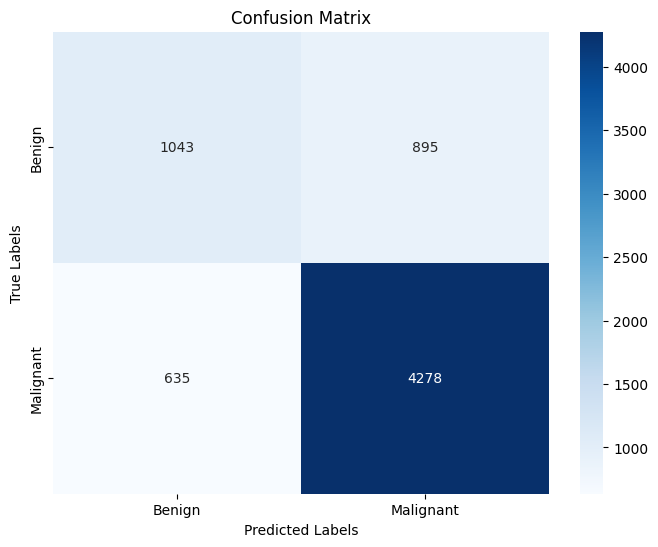

ROC AUC Score: 0.8076


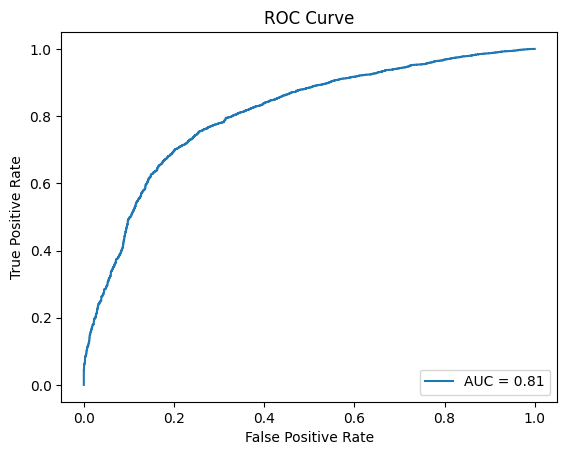

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
# Helper functions
def plot_auc(y_true, y_scores):
    """Plot the ROC AUC curve and display the ROC AUC score."""
    auc_score = roc_auc_score(y_true, y_scores)
    print(f"ROC AUC Score: {auc_score:.4f}")
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
def plot_confusion_matrix(y_true, y_pred, classes):
    """Plot and display the confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
# Model creation function
def create_vgg16_model(num_classes):
    """Create a VGG-16 model for the given number of classes with transfer learning."""
    model = models.vgg16(pretrained=True)
    # Freeze the convolutional layers to retain the pre-trained weights
    for param in model.features.parameters():
        param.requires_grad = False
    # Replace the final layer with a new classifier for the number of classes
    model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    return model
# Training function
def train_vgg16(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10, patience=5):
    """Train the VGG-16 model with early stopping based on validation accuracy."""
    model = model.to(device)
    best_accuracy = 0.0
    best_model_wts = model.state_dict()
    early_stop_counter = 0
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            # Zero the parameter gradients before each backpropagation
            optimizer.zero_grad()
            # Forward pass to compute predictions and loss
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            # Backward pass to calculate gradients and update weights
            loss.backward()
            optimizer.step()
            # Track statistics for loss and accuracy
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
        # Calculate average loss and accuracy for this epoch
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        print(f"Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.4f}")
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                # Forward pass for validation data
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                # Track validation loss and accuracy
                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data)
        # Calculate validation loss and accuracy
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_running_corrects.double() / len(val_loader.dataset)
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
        # Save the best model if it achieves better validation accuracy
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            best_model_wts = model.state_dict()
            early_stop_counter = 0  # Reset early stopping counter when validation improves
        else:
            early_stop_counter += 1
        # Check for early stopping condition
        if early_stop_counter >= patience:
            print("Early stopping triggered.")
            break
    # Restore the model to the best performing state
    model.load_state_dict(best_model_wts)
    torch.save(model.state_dict(), 'best_vgg16_model.pth')
    print(f"Best Validation Accuracy: {best_accuracy:.4f}")
# Testing function
def test_vgg16(model, test_loader, device, class_names):
    """Evaluate the model on test data and plot performance metrics."""
    model.eval()
    test_corrects = 0
    all_labels = []
    all_preds = []
    all_probs = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            # Get model predictions and probabilities for the test data
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            probs = torch.softmax(outputs, dim=1)[:, 1]  # Assuming binary classification
            test_corrects += torch.sum(preds == labels.data)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    # Calculate and print test accuracy
    test_acc = test_corrects.double() / len(test_loader.dataset)
    print(f"Test Accuracy: {test_acc:.4f}")
    # Plot the confusion matrix to show prediction performance
    plot_confusion_matrix(all_labels, all_preds, class_names)
    # Plot the ROC AUC curve for model's performance evaluation
    plot_auc(all_labels, all_probs)
# Main workflow
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Dataset paths
import os
import zipfile
zip_file = '/content/clasification-roi.zip'  # Correct path to your zip file
extract_dir = '/content/dataset'  # Directory to extract the contents

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
img_size = 224
# Verify extracted directories
train_dir = os.path.join(extract_dir, 'train')
val_dir = os.path.join(extract_dir, 'val')
test_dir = os.path.join(extract_dir, 'test')
print(f"Train directory: {train_dir}")
print(f"Validation directory: {val_dir}")
print(f"Test directory: {test_dir}")
# Data augmentation and preprocessing for training, validation, and test sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(img_size),  # Augmentation for training: resize and crop
        transforms.RandomHorizontalFlip(),  # Data augmentation: random horizontal flip
        transforms.ToTensor(),  # Convert image to a PyTorch tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize pixel values
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),  # Resize for validation
        transforms.CenterCrop(img_size),  # Center crop to desired size
        transforms.ToTensor(),  # Convert image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize pixel values
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),  # Resize for test data
        transforms.CenterCrop(img_size),  # Center crop to desired size
        transforms.ToTensor(),  # Convert image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize pixel values
    ]),
}
# Load datasets and create data loaders
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(val_dir, transform=data_transforms['val'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['test'])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Initialize model, loss function, and optimizer
num_classes = len(train_dataset.classes)
class_names = train_dataset.classes
model = create_vgg16_model(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.0001)
# Train and evaluate the model
train_vgg16(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=50, patience=5)
model.load_state_dict(torch.load('best_vgg16_model.pth'))
test_vgg16(model, test_loader, device, class_names)

Train directory: /content/dataset/train
Validation directory: /content/dataset/val
Test directory: /content/dataset/test


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/50
Training Loss: 0.5510, Training Accuracy: 0.7325
Validation Loss: 0.4077, Validation Accuracy: 0.8723
Epoch 2/50
Training Loss: 0.5273, Training Accuracy: 0.7474
Validation Loss: 0.3726, Validation Accuracy: 0.8612
Epoch 3/50
Training Loss: 0.5209, Training Accuracy: 0.7484
Validation Loss: 0.3705, Validation Accuracy: 0.8648
Epoch 4/50
Training Loss: 0.5112, Training Accuracy: 0.7533
Validation Loss: 0.3738, Validation Accuracy: 0.8431
Epoch 5/50
Training Loss: 0.5066, Training Accuracy: 0.7563
Validation Loss: 0.3780, Validation Accuracy: 0.8597
Epoch 6/50
Training Loss: 0.5040, Training Accuracy: 0.7574
Validation Loss: 0.3851, Validation Accuracy: 0.8602
Early stopping triggered.
Best Validation Accuracy: 0.8723


<ipython-input-9-d381003245eb>:182: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_resnet50_model.pth'))


Test Accuracy: 0.7251


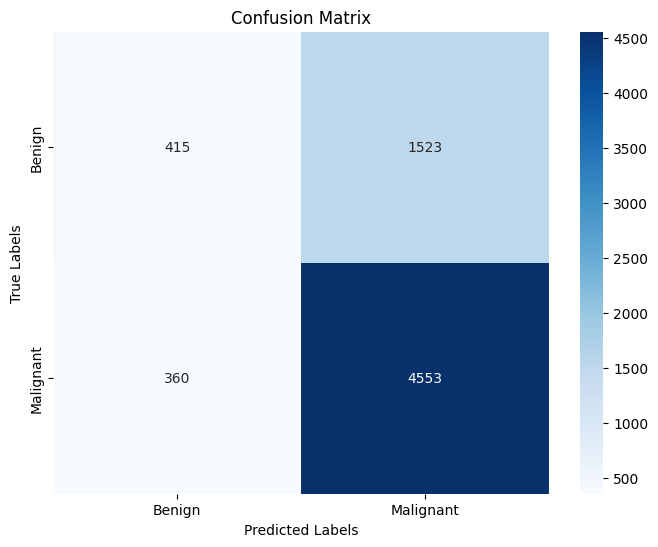

ROC AUC Score: 0.7291


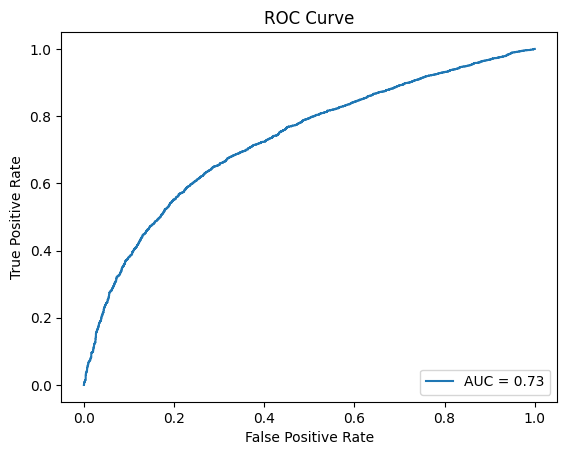

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
# Helper functions to visualize evaluation metrics
def plot_auc(y_true, y_scores):
    """Plot the ROC AUC curve for model performance evaluation."""
    auc_score = roc_auc_score(y_true, y_scores)
    print(f"ROC AUC Score: {auc_score:.4f}")
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
def plot_confusion_matrix(y_true, y_pred, classes):
    """Generate a confusion matrix heatmap to visualize classification performance."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
# Model creation function for ResNet-50 with custom classification head
def create_resnet50_model(num_classes):
    """Build a ResNet-50 model with a modified fully connected layer."""
    model = models.resnet50(pretrained=True)
    # Freeze all layers except the fully connected (classification) layer
    for param in model.parameters():
        param.requires_grad = False
    # Replace the classification layer to match the number of classes
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    return model
# Function to train the ResNet-50 model with early stopping
def train_resnet50(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10, patience=5):
    """Train the ResNet-50 model and implement early stopping based on validation accuracy."""
    model = model.to(device)
    best_accuracy = 0.0
    best_model_wts = model.state_dict()
    early_stop_counter = 0
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            # Zero the gradients for each batch
            optimizer.zero_grad()
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            # Backward pass and optimization step
            loss.backward()
            optimizer.step()
            # Track training statistics
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
        # Calculate epoch loss and accuracy for training
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        print(f"Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.4f}")
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                # Forward pass for validation
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                # Track validation statistics
                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data)
        # Calculate validation loss and accuracy
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_running_corrects.double() / len(val_loader.dataset)
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
        # Save the model if it has the best validation accuracy so far
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            best_model_wts = model.state_dict()
            early_stop_counter = 0  # Reset counter when validation improves
        else:
            early_stop_counter += 1
        # Stop training if the patience limit is reached
        if early_stop_counter >= patience:
            print("Early stopping triggered.")
            break
    # Load the best model weights and save the model
    model.load_state_dict(best_model_wts)
    torch.save(model.state_dict(), 'best_resnet50_model.pth')
    print(f"Best Validation Accuracy: {best_accuracy:.4f}")
# Function to test the ResNet-50 model and plot metrics
def test_resnet50(model, test_loader, device, class_names):
    """Evaluate the model on the test set and display metrics like confusion matrix and ROC AUC curve."""
    model.eval()
    test_corrects = 0
    all_labels = []
    all_preds = []
    all_probs = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            probs = torch.softmax(outputs, dim=1)[:, 1]  # Assumes binary classification
            test_corrects += torch.sum(preds == labels.data)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    # Calculate test accuracy
    test_acc = test_corrects.double() / len(test_loader.dataset)
    print(f"Test Accuracy: {test_acc:.4f}")
    # Plot the confusion matrix and ROC AUC curve
    plot_confusion_matrix(all_labels, all_preds, class_names)
    plot_auc(all_labels, all_probs)
# Main execution workflow
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define the paths for the dataset directories
import os
import zipfile
zip_file = '/content/clasification-roi.zip'  # Correct path to your zip file
extract_dir = '/content/dataset'  # Directory to extract the contents
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
img_size = 224
# Verify extracted directories
train_dir = os.path.join(extract_dir, 'train')
val_dir = os.path.join(extract_dir, 'val')
test_dir = os.path.join(extract_dir, 'test')
print(f"Train directory: {train_dir}")
print(f"Validation directory: {val_dir}")
print(f"Test directory: {test_dir}")
# Define data transformations for training, validation, and testing
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(img_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(img_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(img_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
# Load datasets and create data loaders
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(val_dir, transform=data_transforms['val'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['test'])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Prepare the model, criterion, and optimizer
num_classes = len(train_dataset.classes)
class_names = train_dataset.classes
model = create_resnet50_model(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.0001)
# Train and test the model
train_resnet50(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=50, patience=5)
model.load_state_dict(torch.load('best_resnet50_model.pth'))
test_resnet50(model, test_loader, device, class_names)

Train directory: /content/dataset/train
Validation directory: /content/dataset/val
Test directory: /content/dataset/test


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/50
Training Loss: 0.5620, Training Accuracy: 0.7276
Validation Loss: 0.4197, Validation Accuracy: 0.8421
Epoch 2/50
Training Loss: 0.5372, Training Accuracy: 0.7413
Validation Loss: 0.4473, Validation Accuracy: 0.8281
Epoch 3/50
Training Loss: 0.5262, Training Accuracy: 0.7461
Validation Loss: 0.4242, Validation Accuracy: 0.8276
Epoch 4/50
Training Loss: 0.5206, Training Accuracy: 0.7496
Validation Loss: 0.4381, Validation Accuracy: 0.8145
Epoch 5/50
Training Loss: 0.5163, Training Accuracy: 0.7503
Validation Loss: 0.4193, Validation Accuracy: 0.8180
Epoch 6/50
Training Loss: 0.5149, Training Accuracy: 0.7532
Validation Loss: 0.4117, Validation Accuracy: 0.8220
Early stopping triggered.
Best Validation Accuracy: 0.8421


<ipython-input-12-7e064a0a74f6>:184: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_resnet18_model.pth'))


Test Accuracy: 0.7513


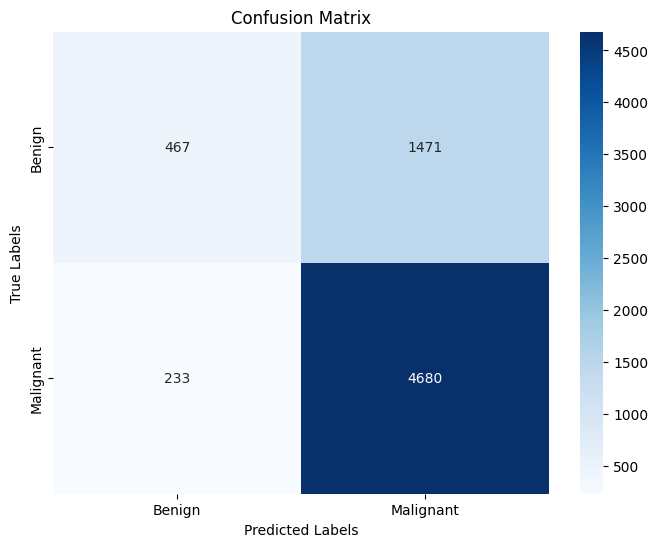

ROC AUC Score: 0.7206


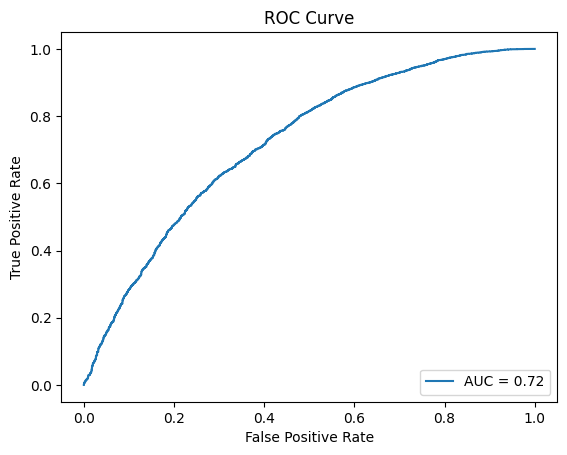

Train directory: /content/dataset/train
Validation directory: /content/dataset/val
Test directory: /content/dataset/test


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/50
Training Loss: 0.5661, Training Accuracy: 0.7253
Validation Loss: 0.4254, Validation Accuracy: 0.8230
Epoch 2/50
Training Loss: 0.5396, Training Accuracy: 0.7406
Validation Loss: 0.4161, Validation Accuracy: 0.8301
Epoch 3/50
Training Loss: 0.5260, Training Accuracy: 0.7459
Validation Loss: 0.4008, Validation Accuracy: 0.8306
Epoch 4/50
Training Loss: 0.5192, Training Accuracy: 0.7495
Validation Loss: 0.4178, Validation Accuracy: 0.8265
Epoch 5/50
Training Loss: 0.5133, Training Accuracy: 0.7517
Validation Loss: 0.4062, Validation Accuracy: 0.8286
Epoch 6/50
Training Loss: 0.5132, Training Accuracy: 0.7535
Validation Loss: 0.4179, Validation Accuracy: 0.8210
Epoch 7/50
Training Loss: 0.5072, Training Accuracy: 0.7535
Validation Loss: 0.4119, Validation Accuracy: 0.8180
Epoch 8/50
Training Loss: 0.5085, Training Accuracy: 0.7547
Validation Loss: 0.4008, Validation Accuracy: 0.8175
Early stopping triggered.
Best Validation Accuracy: 0.8306


<ipython-input-13-7e064a0a74f6>:184: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_resnet18_model.pth'))


Test Accuracy: 0.7546


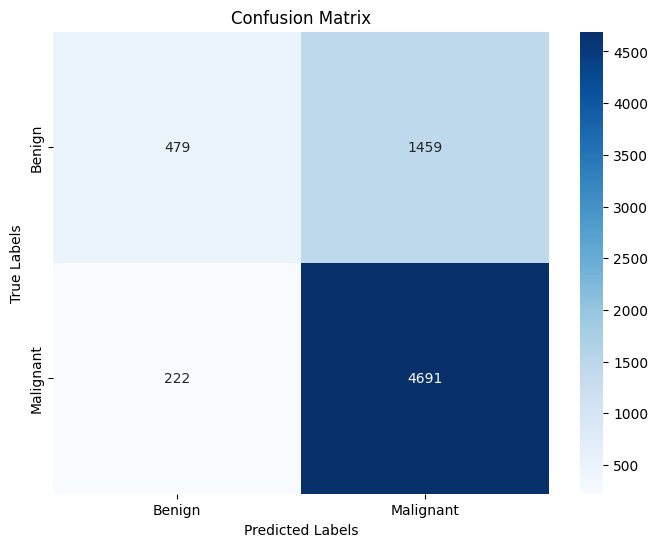

ROC AUC Score: 0.7425


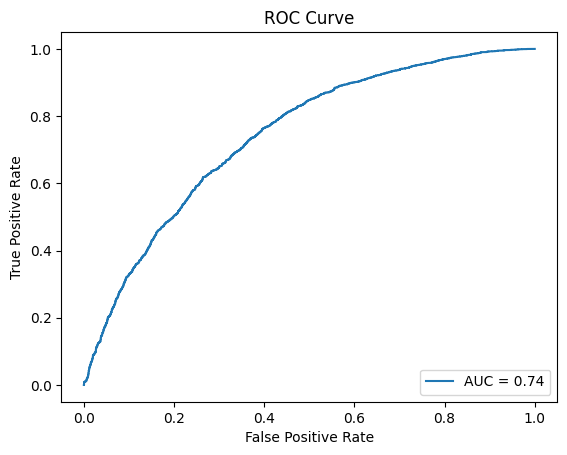

Train directory: /content/dataset/train
Validation directory: /content/dataset/val
Test directory: /content/dataset/test


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/50
Training Loss: 0.5725, Training Accuracy: 0.7260
Validation Loss: 0.4158, Validation Accuracy: 0.8210
Epoch 2/50
Training Loss: 0.5393, Training Accuracy: 0.7384
Validation Loss: 0.4272, Validation Accuracy: 0.8265
Epoch 3/50
Training Loss: 0.5294, Training Accuracy: 0.7420
Validation Loss: 0.4141, Validation Accuracy: 0.8301
Epoch 4/50
Training Loss: 0.5190, Training Accuracy: 0.7511
Validation Loss: 0.4247, Validation Accuracy: 0.8270
Epoch 5/50
Training Loss: 0.5152, Training Accuracy: 0.7515
Validation Loss: 0.4190, Validation Accuracy: 0.8245
Epoch 6/50
Training Loss: 0.5107, Training Accuracy: 0.7569
Validation Loss: 0.4187, Validation Accuracy: 0.8265
Epoch 7/50
Training Loss: 0.5073, Training Accuracy: 0.7559
Validation Loss: 0.4147, Validation Accuracy: 0.8291
Epoch 8/50
Training Loss: 0.5053, Training Accuracy: 0.7592
Validation Loss: 0.4246, Validation Accuracy: 0.8235
Early stopping triggered.
Best Validation Accuracy: 0.8301


<ipython-input-14-7e064a0a74f6>:184: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_resnet18_model.pth'))


Test Accuracy: 0.7567


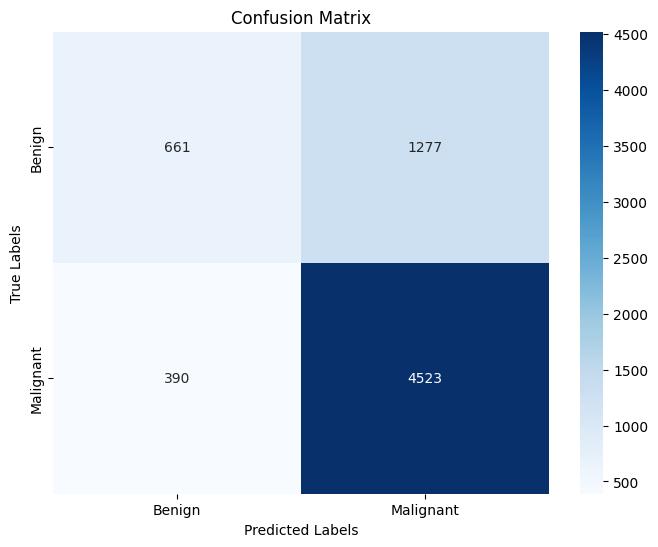

ROC AUC Score: 0.7346


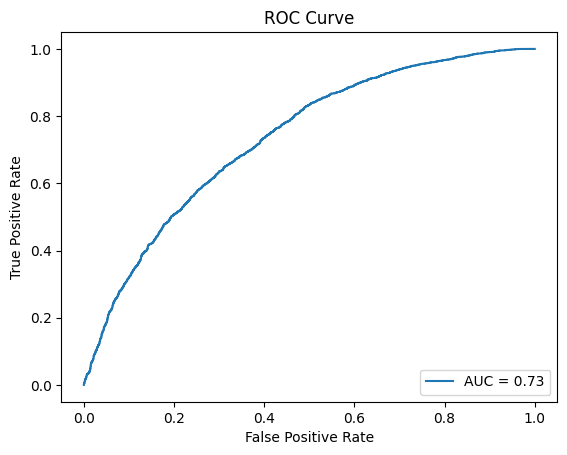

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
# Helper function to plot the ROC AUC curve
def plot_auc(y_true, y_scores):
    """Plot the ROC AUC curve and display the AUC score."""
    auc_score = roc_auc_score(y_true, y_scores)
    print(f"ROC AUC Score: {auc_score:.4f}")
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
# Helper function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    """Display the confusion matrix as a heatmap for better visualization."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
# Model creation function for ResNet-18
def create_resnet18_model(num_classes):
    """Build a ResNet-18 model with a customized fully connected layer for classification."""
    model = models.resnet18(pretrained=True)
    # Freeze all convolutional layers to avoid updating their weights during training
    for param in model.parameters():
        param.requires_grad = False
    # Replace the final fully connected layer to match the number of classes
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    return model
# Function for training the ResNet-18 model
def train_resnet18(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10, patience=5):
    """Train the ResNet-18 model with early stopping based on validation accuracy."""
    model = model.to(device)
    best_accuracy = 0.0
    best_model_wts = model.state_dict()
    early_stop_counter = 0
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        # Training phase: model learns from the training data
        model.train()
        running_loss = 0.0
        running_corrects = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            # Zero the parameter gradients for each batch
            optimizer.zero_grad()
            # Forward pass: compute model prediction
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            # Backward pass and optimization step
            loss.backward()
            optimizer.step()
            # Accumulate loss and calculate the number of correct predictions
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
        # Calculate and print training loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        print(f"Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.4f}")
        # Validation phase: evaluate model performance on validation set
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                # Forward pass: no gradient calculation needed for validation
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                # Accumulate loss and track the number of correct predictions
                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data)
        # Calculate and print validation loss and accuracy for the epoch
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_running_corrects.double() / len(val_loader.dataset)
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
        # Check if the current model is the best so far and save it if so
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            best_model_wts = model.state_dict()
            early_stop_counter = 0  # Reset the counter if validation improves
        else:
            early_stop_counter += 1
        # Stop training early if the validation accuracy does not improve for a set number of epochs
        if early_stop_counter >= patience:
            print("Early stopping triggered.")
            break
    # Load the best model weights and save the model to a file
    model.load_state_dict(best_model_wts)
    torch.save(model.state_dict(), 'best_resnet18_model.pth')
    print(f"Best Validation Accuracy: {best_accuracy:.4f}")
def test_resnet18(model, test_loader, device, class_names):
    """Evaluate the trained model and visualize the test metrics."""
    model.eval()
    test_corrects = 0
    all_labels = []
    all_preds = []
    all_probs = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            # Forward pass to get predictions and probabilities
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            probs = torch.softmax(outputs, dim=1)[:, 1]  # Assuming binary classification
            test_corrects += torch.sum(preds == labels.data)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    # Calculate and display test accuracy
    test_acc = test_corrects.double() / len(test_loader.dataset)
    print(f"Test Accuracy: {test_acc:.4f}")
    # Plot confusion matrix for test predictions
    plot_confusion_matrix(all_labels, all_preds, class_names)
    # Plot the ROC AUC curve for test predictions
    plot_auc(all_labels, all_probs)
# Main script for loading data, training, and testing
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Directories for the dataset
import os
import zipfile
zip_file = '/content/clasification-roi.zip'  # Correct path to your zip file
extract_dir = '/content/dataset'  # Directory to extract the contents
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
img_size = 224
# Verify extracted directories
train_dir = os.path.join(extract_dir, 'train')
val_dir = os.path.join(extract_dir, 'val')
test_dir = os.path.join(extract_dir, 'test')
print(f"Train directory: {train_dir}")
print(f"Validation directory: {val_dir}")
print(f"Test directory: {test_dir}")
# Data transformation pipelines for training, validation, and testing
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(img_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(img_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(img_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
# Load datasets and create data loaders for training, validation, and testing
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(val_dir, transform=data_transforms['val'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['test'])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Set up model, criterion, and optimizer
num_classes = len(train_dataset.classes)
class_names = train_dataset.classes
model = create_resnet18_model(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.0001)
# Train the model and evaluate its performance
train_resnet18(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=50, patience=5)
model.load_state_dict(torch.load('best_resnet18_model.pth'))
test_resnet18(model, test_loader, device, class_names)

In [15]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [16]:
import gradio as gr
from PIL import Image
import torch
import torch.nn as nn
from torchvision import models, transforms
# Function to dynamically load a pre-trained model with specified weights
def load_model(model_name, model_path):
    """Load a ResNet model (ResNet18 or ResNet50) and set it to evaluation mode with pre-trained weights."""
    if model_name == "ResNet18":
        model = models.resnet18(pretrained=False)  # Initialize ResNet18 without pretrained weights
        model.fc = nn.Linear(model.fc.in_features, 2)  # Modify fully connected layer for binary classification
    elif model_name == "ResNet50":
        model = models.resnet50(pretrained=False)  # Initialize ResNet50 without pretrained weights
        model.fc = nn.Linear(model.fc.in_features, 2)  # Modify fully connected layer for binary classification
    else:
        raise ValueError("Invalid model name. Please select either 'ResNet18' or 'ResNet50'.")
    # Load the model's state dict from the specified file path and set it to evaluation mode
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()
    return model
# Image preprocessing function to prepare images for model input
def preprocess_image(image):
    """Transform input image for the model, including resizing, cropping, and normalization."""
    transform = transforms.Compose([
        transforms.Resize(256),  # Resize image to 256 pixels on the shorter side
        transforms.CenterCrop(224),  # Crop the image to 224x224 pixels
        transforms.ToTensor(),  # Convert image to PyTorch tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize using ImageNet mean and std
    ])
    return transform(image).unsqueeze(0)  # Add batch dimension
# Function to predict the class of an input image using the selected model
def predict(image, model_name):
    """Make a prediction using the chosen model and return a formatted response string."""
    image = Image.fromarray(image)  # Convert numpy array input to PIL image format
    input_tensor = preprocess_image(image)  # Preprocess the input image
    # Dictionary mapping model names to their corresponding weight file paths
    model_paths = {
        "ResNet18": "/content/best_resnet18_model.pth",
        "ResNet50": "/content/best_resnet50_model.pth"
    }
    # Load the specified model with its pre-trained weights
    model_path = model_paths[model_name]
    model = load_model(model_name, model_path)
    with torch.no_grad():  # No gradient calculation needed for inference
        outputs = model(input_tensor)  # Get model predictions
        probabilities = torch.softmax(outputs, dim=1)[0]  # Convert raw outputs to probabilities
        # Extract individual class probabilities and determine the predicted class
        benign_prob = probabilities[0].item()
        malignant_prob = probabilities[1].item()
        predicted_idx = probabilities.argmax().item()
        predicted_class = class_names[predicted_idx]  # Map index to class name
    # Format the prediction response for user display
    response = (
        f"Model: {model_name}\n"
        f"Predicted Class: {predicted_class}\n"
        f"Benign Probability: {benign_prob:.2f}\n"
        f"Malignant Probability: {malignant_prob:.2f}"
    )
    return response
# Global variable for class names
class_names = ["benign", "malignant"]  # Define the labels for binary classification
# Set up the Gradio interface with specified input and output components
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Image(type="numpy", label="Upload Image"),  # Input for image upload
        gr.Radio(["ResNet18", "ResNet50"], label="Select Model")  # Input for model selection
    ],
    outputs=gr.Textbox(label="Prediction"),  # Output displaying prediction results
    title="Breast Cancer Classification",  # Title of the app
    description="Upload an image and select a model (ResNet18 or ResNet50) to classify it as benign or malignant."  # Description of the app functionality
)
# Launch the Gradio app interface
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://35b532a4138b6a292c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
